In [23]:
import pyrosetta
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import *
import random
import math
import os
import tempfile
from IPython.display import Image, display, HTML
import glob

pyrosetta.init()
print("PyRosetta initialized and libraries imported.")
import sys
print(f"Python version: {sys.version}")

try:
    import pyrosetta
    print(f"PyRosetta successfully imported")
    
    # Try to get PyRosetta version in a different way
    print(f"PyRosetta package information:")
    print(pyrosetta.__file__)
    
    pyrosetta.init()
    print("PyRosetta initialized")
    
    print("\nAvailable PyRosetta modules and functions:")
    for item in dir(pyrosetta):
        print(f"  - {item}")
    
    print("\nTrying to import specific functions:")
    from pyrosetta import Pose, pose_from_sequence
    print("  Pose and pose_from_sequence imported successfully")
    
    from pyrosetta.rosetta.core.scoring import ScoreFunction, fa_atr, fa_rep, hbond_sr_bb, hbond_lr_bb
    print("  Scoring functions and terms imported successfully")
    
    import random
    import math
    
    # Set a random seed for reproducibility
    random.seed(42)
    
    print("\nAll imports completed successfully")
except ImportError as e:
    print(f"Error importing PyRosetta: {e}")
    print("Please make sure PyRosetta is installed correctly in your environment")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

print("\nImport and initialization process completed")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

In [24]:
import io

try:
    def create_initial_pose():
        return pose_from_sequence("AAAAAAAAAA", "fa_standard")

    initial_pose = create_initial_pose()
    print("Initial pose created successfully")

    print("\nInitial pose information:")
    print(f"Number of residues: {initial_pose.total_residue()}")
    print(f"Sequence: {initial_pose.sequence()}")

    print("\nDumping PDB:")
    # Use a StringIO object to capture the PDB output
    pdb_stream = io.StringIO()
    initial_pose.dump_pdb(pdb_stream)
    pdb_string = pdb_stream.getvalue()
    print(pdb_string)

except Exception as e:
    print(f"Error: {e}")
    print("Please check the PyRosetta installation and imported functions")

Initial pose created successfully

Initial pose information:
Number of residues: 10
Sequence: AAAAAAAAAA

Dumping PDB:
Error: dump_pdb(): incompatible function arguments. The following argument types are supported:
    1. (self: pyrosetta.rosetta.core.pose.Pose, file_name: str) -> bool
    2. (self: pyrosetta.rosetta.core.pose.Pose, out: pyrosetta.rosetta.std.ostream) -> None
    3. (self: pyrosetta.rosetta.core.pose.Pose, out: pyrosetta.rosetta.std.ostream, residue_indices: pyrosetta.rosetta.utility.vector1_unsigned_long) -> None

Invoked with: <pyrosetta.rosetta.core.pose.Pose object at 0x1378c20f0>, <_io.StringIO object at 0x1378e4280>
Please check the PyRosetta installation and imported functions


In [25]:
import random
import math
import tempfile
import os

def random_trial_move(pose):
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    return sfxn

def monte_carlo_folding(pose, num_iterations=100, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
        
        print(f"Iteration {i+1}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy

def dump_pdb_to_string(pose):
    with tempfile.NamedTemporaryFile(mode='w+', delete=False, suffix='.pdb') as temp_file:
        pose.dump_pdb(temp_file.name)
        temp_file.seek(0)
        pdb_string = temp_file.read()
    os.unlink(temp_file.name)
    return pdb_string

# Run the folding simulation
initial_pose = create_initial_pose()
folded_pose, final_energy = monte_carlo_folding(initial_pose)

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")

print("\nFinal folded structure PDB dump:")
pdb_string = dump_pdb_to_string(folded_pose)
print(pdb_string)

Iteration 1: Current Energy = 9.89, Lowest Energy = 9.67
Iteration 2: Current Energy = 9.89, Lowest Energy = 9.67
Iteration 3: Current Energy = 9.89, Lowest Energy = 9.67
Iteration 4: Current Energy = 8.64, Lowest Energy = 8.64
Iteration 5: Current Energy = 8.69, Lowest Energy = 8.64
Iteration 6: Current Energy = 8.69, Lowest Energy = 8.64
Iteration 7: Current Energy = 9.21, Lowest Energy = 8.64
Iteration 8: Current Energy = 9.46, Lowest Energy = 8.64
Iteration 9: Current Energy = 9.25, Lowest Energy = 8.64
Iteration 10: Current Energy = 9.25, Lowest Energy = 8.64
Iteration 11: Current Energy = 9.25, Lowest Energy = 8.64
Iteration 12: Current Energy = 9.25, Lowest Energy = 8.64
Iteration 13: Current Energy = 9.25, Lowest Energy = 8.64
Iteration 14: Current Energy = 8.98, Lowest Energy = 8.64
Iteration 15: Current Energy = 8.95, Lowest Energy = 8.64
Iteration 16: Current Energy = 9.16, Lowest Energy = 8.64
Iteration 17: Current Energy = 9.16, Lowest Energy = 8.64
Iteration 18: Current E

In [26]:
import random
import math
import os
import subprocess

def random_trial_move(pose):
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    return sfxn

def monte_carlo_folding(pose, num_iterations=100, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
        
        print(f"Iteration {i+1}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy

def visualize_with_pymol(pdb_file, output_image):
    pymol_script = f"""
import pymol
pymol.finish_launching()
cmd.load("{pdb_file}", "protein")
cmd.hide("all")
cmd.show("cartoon")
cmd.color("spectrum")
cmd.ray(1024, 768)
cmd.png("{output_image}", dpi=300, ray=1)
cmd.quit()
"""
    with open("pymol_script.pml", "w") as script_file:
        script_file.write(pymol_script)
    
    subprocess.run(["pymol", "-qc", "pymol_script.pml"])
    os.remove("pymol_script.pml")

# Run the folding simulation
initial_pose = create_initial_pose()
folded_pose, final_energy = monte_carlo_folding(initial_pose)

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")

# Save the folded structure as a PDB file
output_pdb = "folded_structure.pdb"
folded_pose.dump_pdb(output_pdb)
print(f"Folded structure saved as {output_pdb}")

# Visualize the folded structure
output_image = "folded_structure.png"
visualize_with_pymol(output_pdb, output_image)
print(f"Visualization saved as {output_image}")

Iteration 1: Current Energy = 8.17, Lowest Energy = 8.17
Iteration 2: Current Energy = 8.18, Lowest Energy = 8.17
Iteration 3: Current Energy = 8.16, Lowest Energy = 8.16
Iteration 4: Current Energy = 8.13, Lowest Energy = 8.13
Iteration 5: Current Energy = 8.13, Lowest Energy = 8.13
Iteration 6: Current Energy = 8.13, Lowest Energy = 8.13
Iteration 7: Current Energy = 8.12, Lowest Energy = 8.12
Iteration 8: Current Energy = 8.12, Lowest Energy = 8.12
Iteration 9: Current Energy = 8.39, Lowest Energy = 8.12
Iteration 10: Current Energy = 6.78, Lowest Energy = 6.78
Iteration 11: Current Energy = 7.29, Lowest Energy = 6.78
Iteration 12: Current Energy = 5.80, Lowest Energy = 5.80
Iteration 13: Current Energy = 5.82, Lowest Energy = 5.80
Iteration 14: Current Energy = 5.86, Lowest Energy = 5.80
Iteration 15: Current Energy = 5.86, Lowest Energy = 5.80
Iteration 16: Current Energy = 5.83, Lowest Energy = 5.80
Iteration 17: Current Energy = 5.83, Lowest Energy = 5.80
Iteration 18: Current E

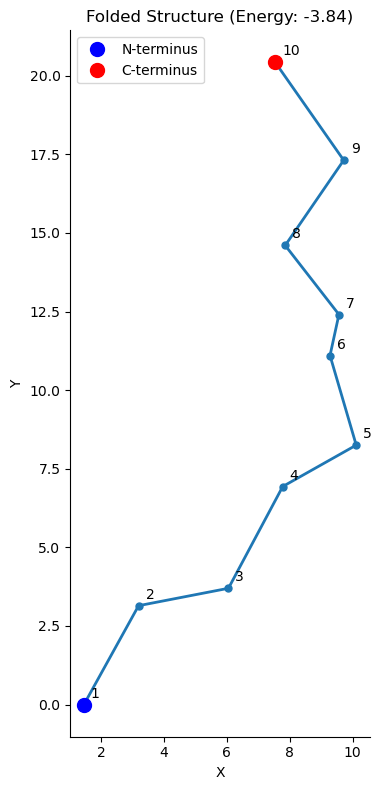

2D visualizations saved as 'initial_structure_2d.png' and 'folded_structure_2d.png'


In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_protein_2d(pose, title="Protein Structure"):
    # Extract coordinates
    coords = []
    for i in range(1, pose.total_residue() + 1):
        residue = pose.residue(i)
        coords.append(residue.xyz("CA"))
    
    coords = np.array(coords)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot backbone
    ax.plot(coords[:, 0], coords[:, 1], '-o', markersize=5, linewidth=2)
    
    # Add residue labels
    for i, (x, y, _) in enumerate(coords):
        ax.annotate(f'{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Highlight N and C termini
    ax.plot(coords[0, 0], coords[0, 1], 'bo', markersize=10, label='N-terminus')
    ax.plot(coords[-1, 0], coords[-1, 1], 'ro', markersize=10, label='C-terminus')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()
    
    # Equal aspect ratio
    ax.set_aspect('equal', 'box')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    return fig

# Visualize initial and folded structures
initial_fig = plot_protein_2d(initial_pose, "Initial Structure")
initial_fig.savefig("initial_structure_2d.png")
plt.close(initial_fig)

folded_fig = plot_protein_2d(folded_pose, f"Folded Structure (Energy: {final_energy:.2f})")
folded_fig.savefig("folded_structure_2d.png")
plt.show()

print("2D visualizations saved as 'initial_structure_2d.png' and 'folded_structure_2d.png'")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

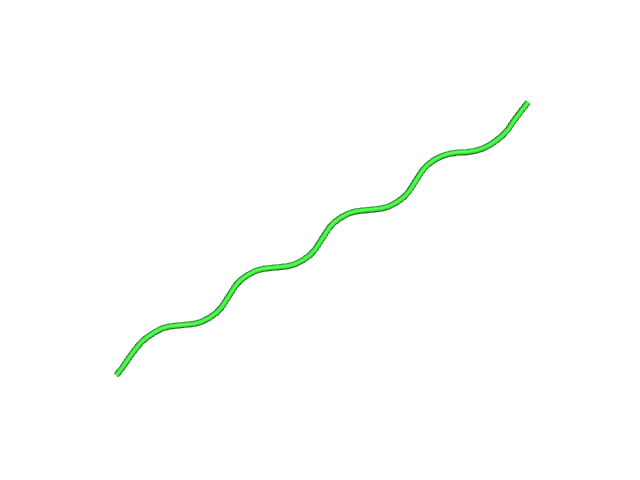

Folded structure:


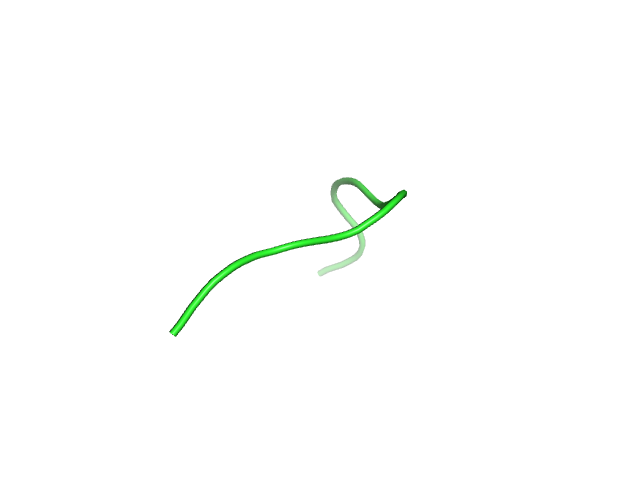

 Movie: frame    1 of    2, 0.01 sec. (0:00:00 - 0:00:00 to go).
 Movie: frame    2 of    2, 0.01 sec. (0:00:00 - 0:00:00 to go).
Folding movie saved as folding_process.mp4



sh: ffmpeg: command not found


In [15]:
import pyrosetta
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import *
import random
import math
import os
import tempfile
from IPython.display import Image, display

pyrosetta.init()

def random_trial_move(pose):
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    return sfxn

def monte_carlo_folding(pose, num_iterations=100, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    trajectory = [current_pose.clone()]
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
            
            trajectory.append(current_pose.clone())
        
        print(f"Iteration {i+1}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy, trajectory

def visualize_with_pymol(pose, output_image):
    with tempfile.NamedTemporaryFile(suffix=".pdb", delete=False) as temp_pdb:
        pose.dump_pdb(temp_pdb.name)
        
        pymol_script = f"""
import pymol
pymol.finish_launching()
cmd.load("{temp_pdb.name}", "protein")
cmd.hide("all")
cmd.show("cartoon")
cmd.color("spectrum")
cmd.ray(1024, 768)
cmd.png("{output_image}", dpi=300, ray=1)
cmd.quit()
"""
        with tempfile.NamedTemporaryFile(suffix=".pml", delete=False) as temp_script:
            temp_script.write(pymol_script.encode())
            temp_script.flush()
            
            os.system(f"pymol -qc {temp_script.name}")
    
    os.unlink(temp_pdb.name)
    os.unlink(temp_script.name)
    
    return Image(filename=output_image)

def create_folding_movie(trajectory, output_movie):
    with tempfile.TemporaryDirectory() as temp_dir:
        for i, pose in enumerate(trajectory):
            pdb_file = os.path.join(temp_dir, f"frame_{i:04d}.pdb")
            pose.dump_pdb(pdb_file)
        
        pymol_script = f"""
import pymol
from pymol import movie
pymol.finish_launching()
cmd.load("{os.path.join(temp_dir, 'frame_*.pdb')}", "protein")
cmd.hide("all")
cmd.show("cartoon")
cmd.color("spectrum")
cmd.mset("1 -%d" % cmd.count_states())
cmd.mplay()
movie.produce("{output_movie}", mode="ray", quality=100, quiet=1)
cmd.quit()
"""
        with tempfile.NamedTemporaryFile(suffix=".pml", delete=False) as temp_script:
            temp_script.write(pymol_script.encode())
            temp_script.flush()
            
            os.system(f"pymol -qc {temp_script.name}")
    
    os.unlink(temp_script.name)
    print(f"Folding movie saved as {output_movie}")

# Run the folding simulation
initial_pose = pose_from_sequence("AAAAAAAAAA", "fa_standard")
folded_pose, final_energy, trajectory = monte_carlo_folding(initial_pose, num_iterations=100)

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")

# Visualize initial and folded structures
initial_image = visualize_with_pymol(initial_pose, "initial_structure.png")
folded_image = visualize_with_pymol(folded_pose, "folded_structure.png")

print("Initial structure:")
display(initial_image)
print("Folded structure:")
display(folded_image)

# Create folding movie
create_folding_movie(trajectory, "folding_process.mp4")

The last simulation starts here

In [28]:
def random_trial_move(pose):
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    return sfxn

def monte_carlo_folding(pose, num_iterations=100, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    trajectory = [current_pose.clone()]
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
            
            trajectory.append(current_pose.clone())
        
        print(f"Iteration {i+1}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy, trajectory

print("Monte Carlo folding functions defined.")

Monte Carlo folding functions defined.


In [29]:
def visualize_with_pymol(pose, output_image):
    with tempfile.NamedTemporaryFile(suffix=".pdb", delete=False) as temp_pdb:
        pose.dump_pdb(temp_pdb.name)
        
        pymol_script = f"""
import pymol
pymol.finish_launching()
cmd.load("{temp_pdb.name}", "protein")
cmd.hide("all")
cmd.show("cartoon")
cmd.color("spectrum")
cmd.ray(800, 600)
cmd.png("{output_image}", dpi=150, ray=1)
cmd.quit()
"""
        with tempfile.NamedTemporaryFile(suffix=".pml", delete=False) as temp_script:
            temp_script.write(pymol_script.encode())
            temp_script.flush()
            
            os.system(f"pymol -qc {temp_script.name}")
    
    os.unlink(temp_pdb.name)
    os.unlink(temp_script.name)
    
    return Image(filename=output_image)

def create_folding_image_series(trajectory, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    images = []
    for i, pose in enumerate(trajectory):
        image_file = os.path.join(output_dir, f"frame_{i:04d}.png")
        img = visualize_with_pymol(pose, image_file)
        images.append(img)
    return images

print("PyMOL visualization functions defined.")

PyMOL visualization functions defined.


In [30]:
# Run the folding simulation
initial_pose = pose_from_sequence("AAAAAAAAAA", "fa_standard")
folded_pose, final_energy, trajectory = monte_carlo_folding(initial_pose, num_iterations=10)  # Reduced iterations for quicker results

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")

# Create folding image series
output_dir = "folding_images"
folding_images = create_folding_image_series(trajectory, output_dir)

print(f"\nAll {len(folding_images)} frames have been saved in the '{output_dir}' directory.")

Iteration 1: Current Energy = 9.65, Lowest Energy = 9.65
Iteration 2: Current Energy = 9.65, Lowest Energy = 9.65
Iteration 3: Current Energy = 9.65, Lowest Energy = 9.65
Iteration 4: Current Energy = 9.65, Lowest Energy = 9.65
Iteration 5: Current Energy = 9.26, Lowest Energy = 9.26
Iteration 6: Current Energy = 7.64, Lowest Energy = 7.64
Iteration 7: Current Energy = 7.62, Lowest Energy = 7.62
Iteration 8: Current Energy = 7.62, Lowest Energy = 7.62
Iteration 9: Current Energy = 7.82, Lowest Energy = 7.62
Iteration 10: Current Energy = 6.73, Lowest Energy = 6.73

Folding complete. Final lowest energy: 6.73

All 9 frames have been saved in the 'folding_images' directory.


Initial structure:


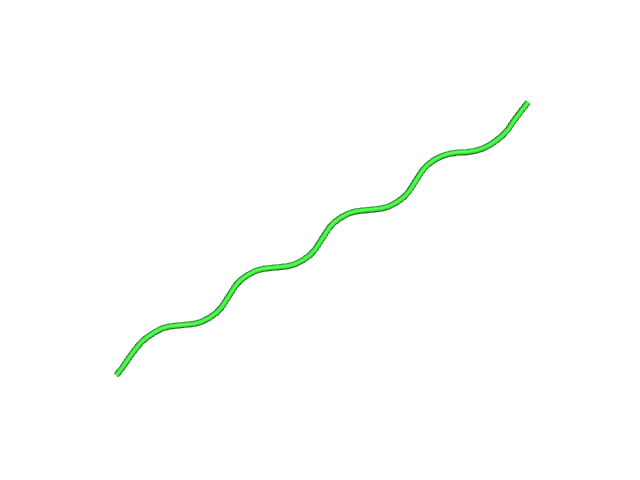

Intermediate structure:


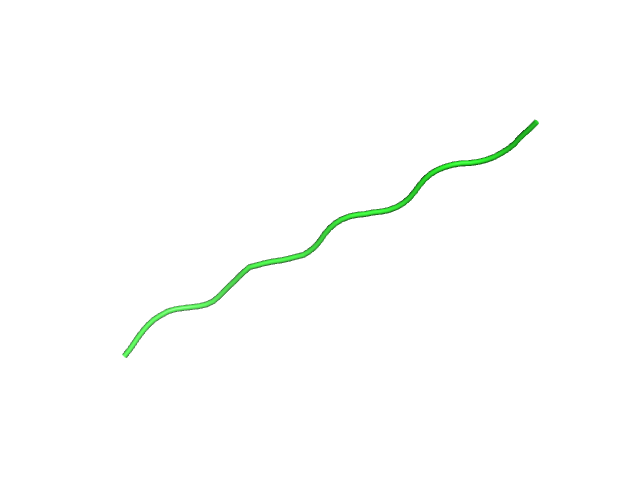

Final folded structure:


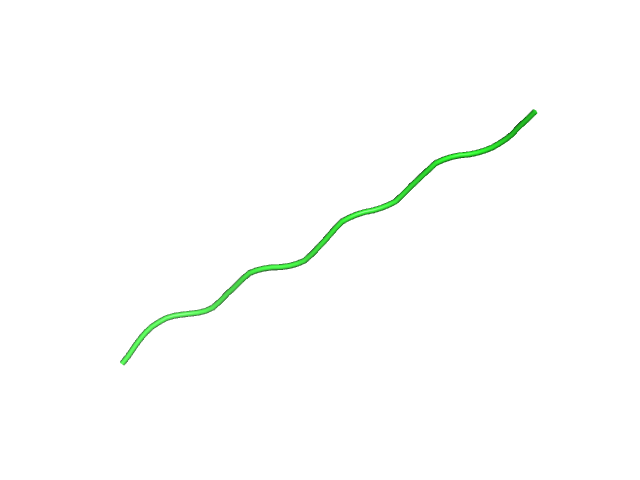

In [32]:
import glob  # Add this import at the top of the cell

# Display initial, intermediate, and final structures
print("Initial structure:")
display(folding_images[0])
print("Intermediate structure:")
display(folding_images[len(folding_images)//2])
print("Final folded structure:")
display(folding_images[-1])

# Display all frames in a scrollable gallery
image_files = sorted(glob.glob(f"{output_dir}/frame_*.png"))
images_html = "".join([f'<img src="{img}" style="width: 200px; margin: 5px;">' for img in image_files])

display(HTML(f"""
<div style="overflow-x: scroll; white-space: nowrap;">
    {images_html}
</div>
"""))

In [35]:
import py3Dmol
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import warnings
import tempfile
import os
from pyrosetta import *

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize PyRosetta if not already done
if 'init' not in dir(pyrosetta):
    pyrosetta.init()

# Create score function
def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_atr, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_rep, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.hbond_sr_bb, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.hbond_lr_bb, 1.0)
    return sfxn

score_function = create_score_function()

# Hydrophobicity scale (Kyte & Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

def get_hydrophobicity(sequence):
    return [hydrophobicity_scale.get(aa, 0) for aa in sequence]

def create_py3dmol_view(pdb_file, color_scheme='hydrophobicity'):
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()
    
    view = py3Dmol.view(width=400, height=300)
    view.addModel(pdb_data, 'pdb')
    
    if color_scheme == 'hydrophobicity':
        sequence = ''.join([line[17:20] for line in pdb_data.split('\n') if line.startswith('ATOM')])
        hydrophobicity = get_hydrophobicity(sequence)
        view.setStyle({'cartoon': {'colorscheme': {'prop': 'residueindex', 'gradient': 'rwb', 'min': min(hydrophobicity), 'max': max(hydrophobicity)}}})
    else:
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    
    view.zoomTo()
    return view

def visualize_folding_progression(trajectory, num_frames=5):
    frames = np.linspace(0, len(trajectory)-1, num_frames, dtype=int)
    
    for i, frame in enumerate(frames):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            trajectory[frame].dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()  # Ensure file is closed before reading
            
            view = create_py3dmol_view(temp_pdb.name)
            
        print(f"Frame {frame}:")
        display(view)
        print(f"Energy: {score_function(trajectory[frame]):.2f}")
        print("\n")
        
        os.unlink(temp_pdb.name)

def interactive_structure_explorer(trajectory):
    def update_view(frame, color_scheme):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            trajectory[frame].dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()  # Ensure file is closed before reading
            
            view = create_py3dmol_view(temp_pdb.name, color_scheme=color_scheme)
        
        display(view)
        print(f"Frame: {frame}, Energy: {score_function(trajectory[frame]):.2f}")
        
        os.unlink(temp_pdb.name)
    
    frame_slider = widgets.IntSlider(min=0, max=len(trajectory)-1, step=1, value=0, description='Frame:')
    color_scheme = widgets.Dropdown(options=['default', 'hydrophobicity'], value='hydrophobicity', description='Color:')
    
    widgets.interactive(update_view, frame=frame_slider, color_scheme=color_scheme)

print("Visualizing folding progression:")
visualize_folding_progression(trajectory)

print("Interactive structure explorer:")
interactive_structure_explorer(trajectory)

Visualizing folding progression:
Frame 0:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 9.67


Frame 2:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 9.65


Frame 4:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 7.64


Frame 6:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 7.62


Frame 8:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 6.73


Interactive structure explorer:


In [41]:
import pyrosetta
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import *
import random
import math
import py3Dmol
from IPython.display import display
import ipywidgets as widgets
import tempfile
import os
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize PyRosetta
pyrosetta.init()

def random_trial_move(pose):
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(fa_sol, 1.0)  # implicit solvation
    sfxn.set_weight(fa_intra_rep, 0.005)  # intraresidue repulsive
    sfxn.set_weight(fa_elec, 1.0)  # coulombic electrostatic potential
    sfxn.set_weight(pro_close, 1.0)  # proline closure
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    sfxn.set_weight(rama_prepro, 0.45)  # ramachandran preferences
    return sfxn

def monte_carlo_folding(pose, num_iterations=10000, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    trajectory = [current_pose.clone()]
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
            
            if i % 50 == 0:  # Save every 50th frame to reduce memory usage
                trajectory.append(current_pose.clone())
        
        if i % 100 == 0:
            print(f"Iteration {i}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy, trajectory

# Hydrophobicity scale (Kyte & Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

def get_hydrophobicity(sequence):
    return [hydrophobicity_scale.get(aa, 0) for aa in sequence]

def create_py3dmol_view(pdb_file, color_scheme='hydrophobicity'):
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()
    
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')
    
    if color_scheme == 'hydrophobicity':
        sequence = ''.join([line[17:20] for line in pdb_data.split('\n') if line.startswith('ATOM')])
        hydrophobicity = get_hydrophobicity(sequence)
        view.setStyle({'cartoon': {'colorscheme': {'prop': 'residueindex', 'gradient': 'rwb', 'min': min(hydrophobicity), 'max': max(hydrophobicity)}}})
    elif color_scheme == 'secondary_structure':
        view.setStyle({'cartoon': {'colorscheme': 'secondary structure'}})
    else:
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    
    view.zoomTo()
    return view

def visualize_folding_progression(trajectory, num_frames=10):
    num_frames = min(num_frames, len(trajectory))
    if num_frames < 2:
        frames = trajectory
    else:
        indices = np.linspace(0, len(trajectory)-1, num_frames, dtype=int)
        frames = [trajectory[i] for i in indices]
    
    for i, frame in enumerate(frames):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            frame.dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()
            
            view = create_py3dmol_view(temp_pdb.name, color_scheme='secondary_structure')
            
        print(f"Frame {i}:")
        display(view)
        print(f"Energy: {score_function(frame):.2f}")
        print("\n")
        
        os.unlink(temp_pdb.name)

def interactive_structure_explorer(trajectory):
    def update_view(frame, color_scheme):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            trajectory[frame].dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()
            
            view = create_py3dmol_view(temp_pdb.name, color_scheme=color_scheme)
        
        display(view)
        print(f"Frame: {frame}, Energy: {score_function(trajectory[frame]):.2f}")
        
        os.unlink(temp_pdb.name)
    
    frame_slider = widgets.IntSlider(min=0, max=len(trajectory)-1, step=1, value=0, description='Frame:')
    color_scheme = widgets.Dropdown(options=['default', 'hydrophobicity', 'secondary_structure'], value='secondary_structure', description='Color:')
    
    widgets.interactive(update_view, frame=frame_slider, color_scheme=color_scheme)

# Define a more complex sequence
complex_sequence = "MKGHGHGHGHGSMPVYREELKQQLHALWQVLGAYESGYSEASVEEALKKLKDEQQQFRQKGFGFTGAETADIPAALENLKRELLDSCYAQLHRGNASLRNMEIKLLQQKLNRRMQQQMQRMQKLAQTQTRN"

# Create initial pose
initial_pose = pose_from_sequence(complex_sequence, "fa_standard")

# Run Monte Carlo folding
print("Starting Monte Carlo folding simulation...")
folded_pose, final_energy, trajectory = monte_carlo_folding(initial_pose, num_iterations=10000)

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")
print(f"Number of frames in trajectory: {len(trajectory)}")

# Visualization
score_function = create_score_function()

print("\nVisualizing folding progression:")
visualize_folding_progression(trajectory)

print("\nInteractive structure explorer:")
interactive_structure_explorer(trajectory)

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 90821.44


Frame 1:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 59344.45


Frame 2:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 41488.96


Frame 3:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 34301.82


Frame 4:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 29724.63


Frame 5:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 27485.69


Frame 6:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26908.03


Frame 7:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26635.65


Frame 8:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26578.09


Frame 9:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26529.29



Interactive structure explorer:


The following program simulates a simple protein-ligand binding process. We'll create a small protein (peptide) and a ligand, then simulate their interaction using a Monte Carlo approach. This will demonstrate how the ligand might bind to the protein. I have to break it into different cells in order to cause less strain on the kernel and prevent crashes.

Imports and Initialization

In [2]:
import pyrosetta
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import *
from pyrosetta.rosetta.protocols.rigid import *
from pyrosetta.rosetta.core.kinematics import FoldTree
import random
import math
import py3Dmol
from IPython.display import display
import ipywidgets as widgets
import tempfile
import os
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize PyRosetta
pyrosetta.init(extra_options="-mute all")

print("Imports complete and PyRosetta initialized.")

# Try to get PyRosetta version information
try:
    print(f"PyRosetta version: {pyrosetta.__version__}")
except AttributeError:
    print("PyRosetta version information not available.")
    print(f"PyRosetta path: {pyrosetta.__file__}")

# Print some information about the PyRosetta installation
print("\nPyRosetta information:")
print(f"PyRosetta path: {pyrosetta.__file__}")
print("Available top-level attributes and methods in pyrosetta:")
for item in dir(pyrosetta):
    if not item.startswith("__"):
        print(f"  - {item}")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
Imports complete and PyRosetta initialized.
PyRosetta version information not available.
PyRosetta path: /opt/anaconda3/envs/rosetta/lib/python3.9/site-packages/pyrosetta-2024.

In [ ]:
Define Functions

In [3]:
def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(fa_sol, 1.0)  # implicit solvation
    sfxn.set_weight(fa_elec, 1.0)  # electrostatics
    sfxn.set_weight(hbond_bb_sc, 1.0)  # backbone-sidechain hbonds
    sfxn.set_weight(hbond_sc, 1.0)  # sidechain-sidechain hbonds
    return sfxn

def setup_foldtree(pose, ligand_start):
    print(f"Setting up fold tree. Total residues: {pose.total_residue()}, Ligand start: {ligand_start}")
    ft = FoldTree()
    try:
        ft.add_edge(1, ligand_start - 1, -1)
        print("Added first edge successfully")
    except Exception as e:
        print(f"Error adding first edge: {e}")
        raise

    try:
        ft.add_edge(1, pose.total_residue(), 1)
        print("Added second edge successfully")
    except Exception as e:
        print(f"Error adding second edge: {e}")
        raise

    try:
        pose.fold_tree(ft)
        print("Fold tree applied to pose successfully")
    except Exception as e:
        print(f"Error applying fold tree to pose: {e}")
        raise

    print("Fold tree setup completed")

def random_rigid_body_move(pose, ligand_start, max_translation=3.0, max_rotation=0.3):
    jump_num = 1
    perturb = RigidBodyPerturbMover(jump_num, max_translation, max_rotation)
    perturb.apply(pose)

def monte_carlo_binding(peptide_pose, ligand_pose, num_iterations=1000, kT=1.0):
    score_function = create_score_function()
    
    # Combine peptide and ligand into a single pose
    combined_pose = Pose()
    combined_pose.assign(peptide_pose)
    combined_pose.append_pose_by_jump(ligand_pose, 1)
    
    ligand_start = peptide_pose.total_residue() + 1
    setup_foldtree(combined_pose, ligand_start)
    
    current_pose = Pose()
    current_pose.assign(combined_pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    trajectory = [current_pose.clone()]
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_rigid_body_move(trial_pose, ligand_start)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
            
            if i % 10 == 0:  # Save every 10th frame to reduce memory usage
                trajectory.append(current_pose.clone())
        
        if i % 100 == 0:
            print(f"Iteration {i}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, final_energy, trajectory

print("Functions defined successfully.")

Functions defined successfully.


In [ ]:
Cell 3: Create Peptide and Ligand Poses

In [4]:
# Define peptide and ligand sequences
peptide_sequence = "AADNNKQLEA"  # A small peptide
ligand_sequence = "FFG"  # A small ligand (tri-peptide in this case)

# Create initial poses
peptide_pose = pose_from_sequence(peptide_sequence, "fa_standard")
ligand_pose = pose_from_sequence(ligand_sequence, "fa_standard")

print("Peptide and ligand poses created successfully.")
print(f"Peptide residues: {peptide_pose.total_residue()}")
print(f"Ligand residues: {ligand_pose.total_residue()}")

Peptide and ligand poses created successfully.
Peptide residues: 10
Ligand residues: 3


In [ ]:
Check Poses

In [5]:
print("Checking peptide pose:")
print(f"Sequence: {peptide_pose.sequence()}")
print(f"Total residues: {peptide_pose.total_residue()}")

print("\nChecking ligand pose:")
print(f"Sequence: {ligand_pose.sequence()}")
print(f"Total residues: {ligand_pose.total_residue()}")

# Combine peptide and ligand into a single pose
combined_pose = Pose()
combined_pose.assign(peptide_pose)
combined_pose.append_pose_by_jump(ligand_pose, 1)

print("\nChecking combined pose:")
print(f"Sequence: {combined_pose.sequence()}")
print(f"Total residues: {combined_pose.total_residue()}")

# Check if the combined pose is what we expect
expected_sequence = peptide_pose.sequence() + ligand_pose.sequence()
if combined_pose.sequence() == expected_sequence:
    print("\nCombined pose sequence is correct.")
else:
    print("\nWarning: Combined pose sequence does not match expected sequence.")
    print(f"Expected: {expected_sequence}")
    print(f"Actual: {combined_pose.sequence()}")

Checking peptide pose:
Sequence: AADNNKQLEA
Total residues: 10

Checking ligand pose:
Sequence: FFG
Total residues: 3

Checking combined pose:
Sequence: AADNNKQLEAFFG
Total residues: 13

Combined pose sequence is correct.


In [ ]:
Check pose information

In [6]:
try:
    print(f"Peptide pose residues: {peptide_pose.total_residue()}")
    print(f"Peptide sequence: {peptide_pose.sequence()}")
    print(f"Combined pose residues: {combined_pose.total_residue()}")
    print(f"Combined sequence: {combined_pose.sequence()}")
    ligand_start = peptide_pose.total_residue() + 1
    print(f"Calculated ligand_start: {ligand_start}")
except Exception as e:
    print(f"Error checking pose information: {e}")
    import traceback
    traceback.print_exc()

Peptide pose residues: 10
Peptide sequence: AADNNKQLEA
Combined pose residues: 13
Combined sequence: AADNNKQLEAFFG
Calculated ligand_start: 11


In [ ]:
Setup of FoldTree

In [7]:
from pyrosetta.rosetta.core.kinematics import FoldTree

print("Starting minimal fold tree check")

try:
    ft = FoldTree()
    print("FoldTree object created")
    
    total_residues = combined_pose.total_residue()
    print(f"Total residues in combined pose: {total_residues}")
    
    ft.add_edge(1, total_residues, -1)
    print("Edge added to FoldTree")
    
    print("Minimal fold tree check completed")
except Exception as e:
    print(f"Error in minimal fold tree check: {e}")

Starting minimal fold tree check
FoldTree object created
Total residues in combined pose: 13
Edge added to FoldTree
Minimal fold tree check completed


In [7]:
from pyrosetta.rosetta.core.kinematics import FoldTree

print("Starting detailed pose and fold tree check")

try:
    print(f"Combined pose total residues: {combined_pose.total_residue()}")
    print(f"Combined pose sequence: {combined_pose.sequence()}")
    
    # Get the current fold tree
    current_ft = combined_pose.fold_tree()
    print(f"Current fold tree: {current_ft}")
    
    # Create a new simple fold tree
    new_ft = FoldTree()
    new_ft.add_edge(1, combined_pose.total_residue(), -1)
    print(f"New simple fold tree created: {new_ft}")
    
    # Try to apply the new fold tree
    combined_pose.fold_tree(new_ft)
    print("New fold tree applied successfully")
    
    # Verify the new fold tree
    updated_ft = combined_pose.fold_tree()
    print(f"Updated fold tree: {updated_ft}")
    
    print("Detailed pose and fold tree check completed")
except Exception as e:
    print(f"Error in detailed check: {e}")
    import traceback
    traceback.print_exc()

Starting detailed pose and fold tree check
Combined pose total residues: 13
Combined pose sequence: AADNNKQLEAFFG
Current fold tree: FOLD_TREE  EDGE 1 10 -1  EDGE 1 11 1  EDGE 11 13 -1 
New simple fold tree created: FOLD_TREE  EDGE 1 13 -1 
New fold tree applied successfully
Updated fold tree: FOLD_TREE  EDGE 1 13 -1 
Detailed pose and fold tree check completed


This cell implements a simplified Monte Carlo simulation that:

Uses a basic score function.
Performs simple perturbations by rotating dihedral angles in the ligand.
Doesn't manipulate the fold tree directly.
Keeps track of the trajectory and energy.

In [9]:
import random
import math
from pyrosetta import Pose, ScoreFunction
from pyrosetta.rosetta.protocols.moves import PyMOLMover

def create_score_function():
    sfxn = ScoreFunction()
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_atr, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_rep, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_sol, 1.0)
    sfxn.set_weight(pyrosetta.rosetta.core.scoring.fa_elec, 1.0)
    return sfxn

def simple_perturbation(pose, ligand_start):
    # Simple perturbation: randomly rotate a dihedral angle in the ligand
    residue = random.randint(ligand_start, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    angle = random.uniform(-180, 180)
    if angle_type == "phi":
        pose.set_phi(residue, angle)
    else:
        pose.set_psi(residue, angle)

def simple_monte_carlo(pose, num_steps=100, kT=1.0):
    score_function = create_score_function()
    current_pose = Pose(pose)
    current_energy = score_function(current_pose)
    ligand_start = 11  # Based on previous information

    trajectory = [Pose(current_pose)]

    for step in range(num_steps):
        trial_pose = Pose(current_pose)
        simple_perturbation(trial_pose, ligand_start)
        trial_energy = score_function(trial_pose)

        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose = trial_pose
            current_energy = trial_energy
            trajectory.append(Pose(current_pose))

        if step % 10 == 0:
            print(f"Step {step}: Energy = {current_energy:.2f}")

    return trajectory, current_energy

print("Starting simple Monte Carlo simulation")
try:
    trajectory, final_energy = simple_monte_carlo(combined_pose, num_steps=100)
    print(f"Simulation completed. Final energy: {final_energy:.2f}")
    print(f"Number of frames in trajectory: {len(trajectory)}")
except Exception as e:
    print(f"Error during simulation: {e}")
    import traceback
    traceback.print_exc()

Starting simple Monte Carlo simulation
Step 0: Energy = 29534.29
Step 10: Energy = 18041.71
Step 20: Energy = 18041.79
Step 30: Energy = 18041.79
Step 40: Energy = 18042.05
Step 50: Energy = 18042.03
Step 60: Energy = 16845.87
Step 70: Energy = 16845.87
Step 80: Energy = 15619.63
Step 90: Energy = 15619.61
Simulation completed. Final energy: 14279.09
Number of frames in trajectory: 49


Visualize Monte Carlo Results

In [12]:
import py3Dmol
from IPython.display import display
import tempfile
import os

def create_py3dmol_view(pose, style='cartoon'):
    view = py3Dmol.view(width=800, height=400)
    
    # Create a temporary file to store the PDB data
    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.pdb') as temp_pdb:
        pose.dump_pdb(temp_pdb.name)
        temp_pdb.flush()
        
        # Read the PDB file
        with open(temp_pdb.name, 'r') as pdb_file:
            pdb_string = pdb_file.read()
    
    # Remove the temporary file
    os.unlink(temp_pdb.name)
    
    view.addModel(pdb_string, 'pdb')
    view.setStyle({style: {'color': 'spectrum'}})
    view.zoomTo()
    return view

print("Visualizing initial state")
initial_view = create_py3dmol_view(trajectory[0])
display(initial_view)

print("\nVisualizing final state")
final_view = create_py3dmol_view(trajectory[-1])
display(final_view)

print("\nEnergy comparison:")
print(f"Initial energy: {create_score_function()(trajectory[0]):.2f}")
print(f"Final energy: {create_score_function()(trajectory[-1]):.2f}")

Visualizing initial state


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Visualizing final state


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Energy comparison:
Initial energy: 29534.29
Final energy: 14279.09


In [13]:
def analyze_binding_interface(pose, peptide_length=10, distance_cutoff=8.0):
    interface_residues = set()
    for i in range(1, peptide_length + 1):
        for j in range(peptide_length + 1, pose.total_residue() + 1):
            if pose.residue(i).xyz("CA").distance(pose.residue(j).xyz("CA")) <= distance_cutoff:
                interface_residues.add(i)
                interface_residues.add(j)
    
    return interface_residues

initial_interface = analyze_binding_interface(trajectory[0])
final_interface = analyze_binding_interface(trajectory[-1])

print("Initial binding interface residues:", sorted(initial_interface))
print("Final binding interface residues:", sorted(final_interface))

Initial binding interface residues: [1, 2, 3, 4, 5, 11, 12, 13]
Final binding interface residues: [1, 2, 3, 11, 12, 13]


Starting simulated annealing Monte Carlo simulation
Step 0: Energy = 29534.29, kT = 5.00
Step 100: Energy = 14164.11, kT = 4.55
Step 200: Energy = 14165.56, kT = 4.10
Step 300: Energy = 14163.83, kT = 3.65
Step 400: Energy = 14139.89, kT = 3.20
Step 500: Energy = 14124.58, kT = 2.75
Step 600: Energy = 14121.00, kT = 2.30
Step 700: Energy = 14120.83, kT = 1.85
Step 800: Energy = 14116.95, kT = 1.40
Step 900: Energy = 14115.07, kT = 0.95
Simulation completed. Final energy: 14100.40
Number of frames in trajectory: 462


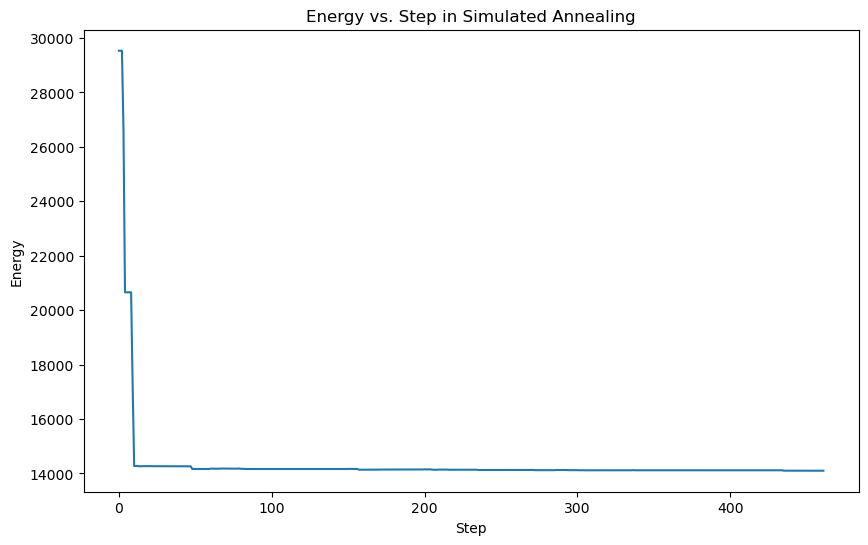

In [14]:
def simulated_annealing_monte_carlo(pose, num_steps=1000, initial_kT=5.0, final_kT=0.5):
    score_function = create_score_function()
    current_pose = Pose(pose)
    current_energy = score_function(current_pose)
    ligand_start = 11  # Based on previous information

    trajectory = [Pose(current_pose)]
    energies = [current_energy]

    for step in range(num_steps):
        kT = initial_kT + (final_kT - initial_kT) * step / num_steps
        
        trial_pose = Pose(current_pose)
        simple_perturbation(trial_pose, ligand_start)
        trial_energy = score_function(trial_pose)

        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose = trial_pose
            current_energy = trial_energy
            trajectory.append(Pose(current_pose))
            energies.append(current_energy)

        if step % 100 == 0:
            print(f"Step {step}: Energy = {current_energy:.2f}, kT = {kT:.2f}")

    return trajectory, energies

print("Starting simulated annealing Monte Carlo simulation")
sa_trajectory, sa_energies = simulated_annealing_monte_carlo(combined_pose, num_steps=1000)
print(f"Simulation completed. Final energy: {sa_energies[-1]:.2f}")
print(f"Number of frames in trajectory: {len(sa_trajectory)}")

# Plot energy vs. step
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sa_energies)
plt.title("Energy vs. Step in Simulated Annealing")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()

In [18]:
import pyrosetta
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import *
import random
import math
import py3Dmol
from IPython.display import display
import ipywidgets as widgets
import tempfile
import os
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize PyRosetta
pyrosetta.init()

def random_trial_move(pose):
    """Randomly perturbs phi or psi angle of a random residue."""
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def create_score_function():
    """Creates and returns a custom score function."""
    sfxn = ScoreFunction()
    sfxn.set_weight(fa_atr, 1.0)  # van der Waals attractive
    sfxn.set_weight(fa_rep, 1.0)  # van der Waals repulsive
    sfxn.set_weight(fa_sol, 1.0)  # implicit solvation
    sfxn.set_weight(fa_intra_rep, 0.005)  # intraresidue repulsive
    sfxn.set_weight(fa_elec, 1.0)  # electrostatic potential
    sfxn.set_weight(pro_close, 1.0)  # proline closure
    sfxn.set_weight(hbond_sr_bb, 1.0)  # short-range backbone hydrogen bonds
    sfxn.set_weight(hbond_lr_bb, 1.0)  # long-range backbone hydrogen bonds
    sfxn.set_weight(rama_prepro, 0.45)  # ramachandran preferences
    return sfxn

def monte_carlo_folding(pose, num_iterations=10000, kT=1.0):
    """Runs Monte Carlo folding simulation."""
    score_function = create_score_function()
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    trajectory = [current_pose.clone()]
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < math.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
            
            if i % 50 == 0:  # Save every 50th frame to reduce memory usage
                trajectory.append(current_pose.clone())
        
        if i % 100 == 0:
            print(f"Iteration {i}: Current Energy = {current_energy:.2f}, Lowest Energy = {low_energy:.2f}")
    
    return low_pose, low_energy, trajectory

# Hydrophobicity scale (Kyte & Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

def get_hydrophobicity(sequence):
    """Returns hydrophobicity values for the input sequence."""
    return [hydrophobicity_scale.get(aa, 0) for aa in sequence]

def create_py3dmol_view(pdb_file, color_scheme='hydrophobicity'):
    """Creates a 3Dmol.js view for visualizing protein structure."""
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()
    
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')
    
    if color_scheme == 'hydrophobicity':
        sequence = ''.join([line[17:20] for line in pdb_data.split('\n') if line.startswith('ATOM')])
        hydrophobicity = get_hydrophobicity(sequence)
        view.setStyle({'cartoon': {'colorscheme': {'prop': 'residueindex', 'gradient': 'rwb', 'min': min(hydrophobicity), 'max': max(hydrophobicity)}}})
    elif color_scheme == 'secondary_structure':
        view.setStyle({'cartoon': {'colorscheme': 'secondary structure'}})
    else:
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    
    view.zoomTo()
    return view

def visualize_folding_progression(trajectory, num_frames=10):
    """Visualizes folding progression using py3Dmol."""
    num_frames = min(num_frames, len(trajectory))
    if num_frames < 2:
        frames = trajectory
    else:
        indices = np.linspace(0, len(trajectory)-1, num_frames, dtype=int)
        frames = [trajectory[i] for i in indices]
    
    for i, frame in enumerate(frames):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            frame.dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()
            
            view = create_py3dmol_view(temp_pdb.name, color_scheme='secondary_structure')
            
        print(f"Frame {i}:")
        display(view)
        print(f"Energy: {score_function(frame):.2f}")
        print("\n")
        
        os.unlink(temp_pdb.name)

def interactive_structure_explorer(trajectory):
    """Creates an interactive explorer for the trajectory using widgets."""
    def update_view(frame, color_scheme):
        with tempfile.NamedTemporaryFile(suffix=".pdb", mode='w+', delete=False) as temp_pdb:
            trajectory[frame].dump_pdb(temp_pdb.name)
            temp_pdb.flush()
            temp_pdb.close()
            
            view = create_py3dmol_view(temp_pdb.name, color_scheme=color_scheme)
        
        display(view)
        print(f"Frame: {frame}, Energy: {score_function(trajectory[frame]):.2f}")
        
        os.unlink(temp_pdb.name)
    
    frame_slider = widgets.IntSlider(min=0, max=len(trajectory)-1, step=1, value=0, description='Frame:')
    color_scheme = widgets.Dropdown(options=['default', 'hydrophobicity', 'secondary_structure'], value='secondary_structure', description='Color:')
    
    widgets.interactive(update_view, frame=frame_slider, color_scheme=color_scheme)

# Define a more complex sequence
complex_sequence = "MKGHGHGHGHGSMPVYREELKQQLHALWQVLGAYESGYSEASVEEALKKLKDEQQQFRQKGFGFTGAETADIPAALENLKRELLDSCYAQLHRGNASLRNMEIKLLQQKLNRRMQQQMQRMQKLAQTQTRN"

# Create initial pose
initial_pose = pose_from_sequence(complex_sequence, "fa_standard")

# Run Monte Carlo folding
print("Starting Monte Carlo folding simulation...")
folded_pose, final_energy, trajectory = monte_carlo_folding(initial_pose, num_iterations=10000)

print(f"\nFolding complete. Final lowest energy: {final_energy:.2f}")
print(f"Number of frames in trajectory: {len(trajectory)}")

# Visualization
score_function = create_score_function()

print("\nVisualizing folding progression:")
visualize_folding_progression(trajectory)

print("\nInteractive structure explorer:")
interactive_structure_explorer(trajectory)

# Corrected scoring terms printing
print("\nScoring terms included in score3:")
non_zero_scoretypes = score_function.get_nonzero_weighted_scoretypes()
for scoretype in non_zero_scoretypes:
    weight = score_function.get_weight(scoretype)
    print(f"{scoretype}: {weight}")



┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
Starting Monte Carlo folding simulation...
Iteration 0: Current Energy = 90821.44, Lowest Energy = 90821.44
Iteration 100: Current Energy = 85059.70, Lowest Energy = 85059.70
I

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 90821.44


Frame 1:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 52522.87


Frame 2:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 33450.20


Frame 3:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 29364.87


Frame 4:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 28141.89


Frame 5:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26936.77


Frame 6:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26720.43


Frame 7:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26586.52


Frame 8:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26582.53


Frame 9:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Energy: 26544.95



Interactive structure explorer:

Scoring terms included in score3:
ScoreType.fa_atr: 1.0
ScoreType.fa_rep: 1.0
ScoreType.fa_sol: 1.0
ScoreType.fa_intra_rep: 0.005
ScoreType.fa_elec: 1.0
ScoreType.pro_close: 1.0
ScoreType.hbond_sr_bb: 1.0
ScoreType.hbond_lr_bb: 1.0
ScoreType.rama_prepro: 0.45


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
Running trajectory 1/100 for sequence AAAAAAAAAA...
Running trajectory 2/100 for sequence AAAAAAAAAA...
Running trajectory 3/100 for sequence AAAAAAAAAA...
Running trajectory 4

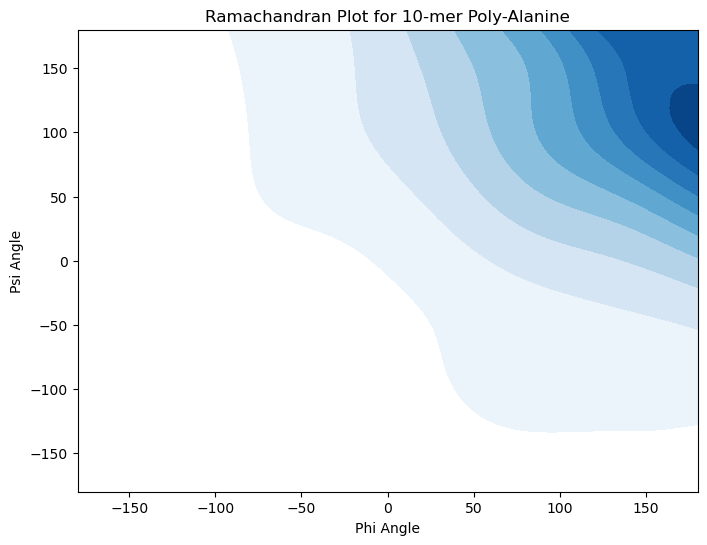

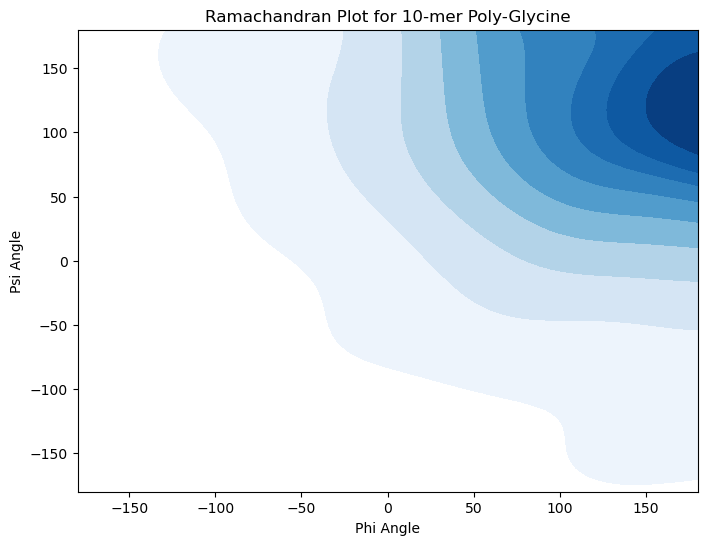

In [24]:
import pyrosetta
from pyrosetta import *
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PyRosetta
pyrosetta.init()

def random_trial_move(pose):
    """Randomly perturbs phi or psi angle of a random residue."""
    residue = random.randint(1, pose.total_residue())
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)  # Mean 0, std dev 25 degrees
    
    if angle_type == "phi":
        current_angle = pose.phi(residue)
        pose.set_phi(residue, current_angle + perturbation)
    else:
        current_angle = pose.psi(residue)
        pose.set_psi(residue, current_angle + perturbation)

def monte_carlo_folding(pose, num_iterations=1000, kT=1.0):
    """Runs Monte Carlo folding simulation."""
    score_function = create_score_function('score3')
    current_pose = Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    for i in range(num_iterations):
        trial_pose = Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < np.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
    
    return low_pose, low_energy

def run_simulations(sequence, num_trajectories=100, num_iterations=1000):
    """Run Monte Carlo simulations and return lowest scoring poses."""
    lowest_poses = []
    
    for i in range(num_trajectories):
        print(f"Running trajectory {i+1}/{num_trajectories} for sequence {sequence}...")
        pose = pose_from_sequence(sequence, "centroid")
        low_pose, _ = monte_carlo_folding(pose, num_iterations=num_iterations)
        lowest_poses.append(low_pose)
    
    return lowest_poses

def extract_phi_psi(poses):
    """Extracts phi and psi angles for each residue from a list of poses."""
    phi_angles = []
    psi_angles = []
    
    for pose in poses:
        for i in range(1, pose.total_residue() + 1):
            phi_angles.append(pose.phi(i))
            psi_angles.append(pose.psi(i))
    
    return np.array(phi_angles), np.array(psi_angles)

def plot_ramachandran(phi, psi, title):
    """Generates and displays a Ramachandran plot."""
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=phi, y=psi, cmap="Blues", fill=True)
    plt.xlim([-180, 180])
    plt.ylim([-180, 180])
    plt.xlabel("Phi Angle")
    plt.ylabel("Psi Angle")
    plt.title(title)
    plt.show()

# Define sequences
poly_alanine = "A" * 10  # 10-mer poly-alanine
poly_glycine = "G" * 10  # 10-mer poly-glycine

# Run simulations
lowest_poses_alanine = run_simulations(poly_alanine, num_trajectories=100, num_iterations=1000)
lowest_poses_glycine = run_simulations(poly_glycine, num_trajectories=100, num_iterations=1000)

# Extract phi/psi angles
phi_ala, psi_ala = extract_phi_psi(lowest_poses_alanine)
phi_gly, psi_gly = extract_phi_psi(lowest_poses_glycine)

# Plot Ramachandran plots
plot_ramachandran(phi_ala, psi_ala, "Ramachandran Plot for 10-mer Poly-Alanine")
plot_ramachandran(phi_gly, psi_gly, "Ramachandran Plot for 10-mer Poly-Glycine")


This code is designed to simulate protein folding using the Monte Carlo method in PyRosetta, and it evaluates the quality of the folded structures by comparing them to known native structures using RMSD (Root Mean Square Deviation).

Import Required Libraries

In [32]:
# Import required modules
import pyrosetta
from pyrosetta import pose_from_pdb
from pyrosetta.rosetta.core.scoring import CA_rmsd
import random
import numpy as np
import os
import matplotlib.pyplot as plt

In [33]:
# Initialize PyRosetta
pyrosetta.init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org


This cell defines a function download_pdb_files that:

Downloads PDB files using Bio.PDB.
Renames the files from .ent to .pdb.
Ensures the files are saved in the ./pdb_files directory.

In [34]:
# Function to download PDB files if not present
def download_pdb_files(pdb_ids, pdb_dir='./pdb_files'):
    pdbl = PDBList()
    os.makedirs(pdb_dir, exist_ok=True)
    for pdb_id in pdb_ids:
        pdbl.retrieve_pdb_file(pdb_id, pdir=pdb_dir, file_format='pdb')
        ent_file = os.path.join(pdb_dir, f"pdb{pdb_id.lower()}.ent")
        pdb_file = os.path.join(pdb_dir, f"{pdb_id}.pdb")
        if os.path.exists(ent_file):
            os.rename(ent_file, pdb_file)
            print(f"Downloaded and renamed {pdb_id} to {pdb_file}")
        else:
            print(f"Failed to download {pdb_id}")


This cell defines a random_trial_move function that:

Randomly perturbs either the phi or psi angle of a randomly selected residue within the protein structure.

In [48]:
# Random trial move function (updated)
def random_trial_move(pose):
    """Randomly perturbs phi or psi angle of a random protein residue."""
    residue = random.randint(1, pose.total_residue())
    
    # Check if the residue is a protein residue (has phi and psi angles)
    if not pose.residue(residue).is_protein():
        return  # Skip this residue if it's not a protein residue
    
    angle_type = random.choice(["phi", "psi"])
    perturbation = random.gauss(0, 25)
    
    if angle_type == "phi":
        pose.set_phi(residue, pose.phi(residue) + perturbation)
    else:
        pose.set_psi(residue, pose.psi(residue) + perturbation)


This cell defines the monte_carlo_folding function, which:

Runs a Monte Carlo simulation using a high-resolution ref15 score function.
For each iteration, the protein structure undergoes a random trial move.
If the move lowers the energy or passes the Monte Carlo criteria, the new conformation is accepted.


In [49]:
# Monte Carlo folding simulation (Updated with score12 or score3)
def monte_carlo_folding(pose, num_iterations=10000, kT=1.0):
    # Fix: Use score12 for high-resolution scoring
    score_function = pyrosetta.create_score_function('score12')  # Change from 'ref15' to 'score12'
    
    current_pose = pyrosetta.Pose()
    current_pose.assign(pose)
    current_energy = score_function(current_pose)
    
    low_pose = pyrosetta.Pose()
    low_pose.assign(current_pose)
    low_energy = current_energy
    
    for i in range(num_iterations):
        trial_pose = pyrosetta.Pose()
        trial_pose.assign(current_pose)
        random_trial_move(trial_pose)
        trial_energy = score_function(trial_pose)
        
        if trial_energy < current_energy or random.random() < np.exp(-(trial_energy - current_energy) / kT):
            current_pose.assign(trial_pose)
            current_energy = trial_energy
            
            if current_energy < low_energy:
                low_pose.assign(current_pose)
                low_energy = current_energy
                
    return low_pose, low_energy


In [ ]:
This cell defines the run_simulations function, which:

Runs the Monte Carlo folding simulation across multiple independent trajectories.
After each simulation, it calculates the RMSD of the lowest-energy pose compared to the native structure.

In [50]:
# Run simulations
def run_simulations(pdb_file, native_pose, num_trajectories=100, num_iterations=10000):
    lowest_poses = []
    rmsd_scores = []
    for i in range(num_trajectories):
        print(f"Running trajectory {i+1}/{num_trajectories} for protein {pdb_file}...")
        pose = pose_from_pdb(pdb_file)
        low_pose, _ = monte_carlo_folding(pose, num_iterations=num_iterations)
        rmsd = CA_rmsd(low_pose, native_pose)
        rmsd_scores.append(rmsd)
        lowest_poses.append(low_pose)
        print(f"Trajectory {i+1}: RMSD = {rmsd:.2f} Å")
    return lowest_poses, rmsd_scores


This cell defines the plot_rmsd_histogram function, which:

Plots the distribution of RMSD scores obtained from all the independent trajectories.
Visualizes how close the folded structures are to the native structure.


In [51]:
# Plot RMSD histogram
def plot_rmsd_histogram(rmsd_scores, title):
    plt.figure(figsize=(8, 6))
    plt.hist(rmsd_scores, bins=20, color="skyblue")
    plt.title(title)
    plt.xlabel("RMSD (Å)")
    plt.ylabel("Frequency")
    plt.show()


This cell sets the PDB IDs for Hox-B1 (1B72) and RecA (2REB) and downloads the PDB files if they are not already available.

In [52]:
# PDB IDs and file paths
pdb_ids = ["1B72", "2REB"]
pdb_dir = './pdb_files'

# Download PDB files if not already available
download_pdb_files(pdb_ids, pdb_dir)


Downloaded and renamed 1B72 to ./pdb_files/1B72.pdb
Downloaded and renamed 2REB to ./pdb_files/2REB.pdb


This cell loads the native structures of Hox-B1 and RecA using PyRosetta’s pose_from_pdb() function.

In [53]:
# Load native structures
native_hoxb1 = pose_from_pdb(os.path.join(pdb_dir, "1B72.pdb"))
native_reca = pose_from_pdb(os.path.join(pdb_dir, "2REB.pdb"))


core.import_pose.import_pose: File './pdb_files/1B72.pdb' automatically determined to be of type PDB
core.pack.pack_missing_sidechains: packing residue number 42 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 48 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 69 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 74 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 104 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 105 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 106 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 107 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechai

This cell runs Monte Carlo folding simulations for Hox-B1 homeobox protein (1B72) using 100 independent trajectories, with 10,000 iterations each.



In [54]:
# Run simulations for Hox-B1 homeobox protein (1b72)
print("\nRunning simulations for Hox-B1 homeobox protein (1b72)...")
lowest_poses_hoxb1, rmsd_hoxb1 = run_simulations(os.path.join(pdb_dir, "1B72.pdb"), native_hoxb1, num_trajectories=100, num_iterations=10000)



Running simulations for Hox-B1 homeobox protein (1b72)...
Running trajectory 1/100 for protein ./pdb_files/1B72.pdb...
core.import_pose.import_pose: File './pdb_files/1B72.pdb' automatically determined to be of type PDB
core.pack.pack_missing_sidechains: packing residue number 42 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 48 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 69 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 74 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 104 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 105 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 106 because of missing atom number 6 atom name  CG
core.pack.pack_missi

Key Improvements of the model in the following program:
Increase the Number of Trajectories: Run more simulations to explore additional conformations.
Adjust the Temperature Parameter (kT): Use different temperature settings for better exploration.
Refine the Starting Pose: Perform additional pre-optimization of the pose before Monte Carlo folding.
Add Constraints: Use constraints to guide the folding toward a native-like state.

In [69]:
# Cell 1: Imports and Initialization
import os
import random
import time
import numpy as np
import pyrosetta
from pyrosetta import init, pose_from_pdb, Pose, create_score_function
from pyrosetta.rosetta.core.scoring import CA_rmsd
from pyrosetta.rosetta.protocols.moves import MonteCarlo

# Initialize PyRosetta
pyrosetta.init()

print("PyRosetta initialized and imports complete.")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
PyRosetta initialized and imports complete.


Pre-optimization (pre_optimize_pose): Minimizes the energy of the starting pose to ensure a better folding trajectory.
Flexible temperature (kT): Allows varying the temperature parameter to explore more conformational space.
Time function: Still tracks the time for each simulation.


In [74]:
# Cell 2: Updated Utility Functions
def create_score_function(name='ref2015'):
    """Create a score function."""
    return pyrosetta.create_score_function(name)

def perturb_pose(pose):
    """Apply small random perturbations to the pose, skipping non-protein residues."""
    for residue in range(1, pose.total_residue() + 1):
        if pose.residue(residue).is_protein():
            if pose.residue(residue).name() != "PRO":  # Skip proline residues
                try:
                    perturbation_phi = random.gauss(0, 10)  # Adjust the standard deviation as needed
                    perturbation_psi = random.gauss(0, 10)
                    current_phi = pose.phi(residue)
                    current_psi = pose.psi(residue)
                    pose.set_phi(residue, current_phi + perturbation_phi)
                    pose.set_psi(residue, current_psi + perturbation_psi)
                except RuntimeError as e:
                    print(f"Warning: Could not perturb residue {residue}. Error: {e}")

def pre_optimize_pose(pose, min_iterations=100):
    """Refine the starting pose using a minimization step to ensure a better start."""
    score_function = create_score_function('ref2015')
    
    # Create a MoveMap that allows backbone and sidechain movement for protein residues only
    move_map = pyrosetta.rosetta.core.kinematics.MoveMap()
    for i in range(1, pose.total_residue() + 1):
        if pose.residue(i).is_protein():
            move_map.set_bb(i, True)
            move_map.set_chi(i, True)

    # Create the MinMover with the MoveMap and the ScoreFunction
    minimizer = pyrosetta.rosetta.protocols.minimization_packing.MinMover(
        move_map, score_function, "dfpmin_armijo_nonmonotone", 0.01, True)

    # Apply the minimization to the pose
    minimizer.apply(pose)

    return pose

print("Updated utility functions defined.")

Updated utility functions defined.


Cell 3: Define Native Pose for Hox-B1

In [75]:
# Cell 3: Updated Monte Carlo Folding Function
def monte_carlo_folding(pose, num_iterations=10000, kT=1.0):
    """Perform a Monte Carlo folding simulation with flexible temperature."""
    score_function = create_score_function('ref2015')

    current_pose = Pose()
    current_pose.assign(pose)

    # Initialize Monte Carlo simulation
    mc = MonteCarlo(current_pose, score_function, kT)

    low_pose = Pose()
    low_pose.assign(current_pose)

    for i in range(num_iterations):
        try:
            # Apply small random perturbation to the pose
            perturb_pose(current_pose)

            # Recalculate energy and decide whether to accept/reject
            mc.boltzmann(current_pose)

            # Keep track of the lowest energy structure
            if mc.lowest_score() < score_function(low_pose):
                low_pose.assign(mc.lowest_score_pose())
        except Exception as e:
            print(f"Warning: Error in iteration {i}. Skipping. Error: {e}")
            continue

    return low_pose, mc.lowest_score()

print("Updated Monte Carlo folding function defined.")

Updated Monte Carlo folding function defined.


Increased number of trajectories: num_trajectories=200 to explore more conformations.
Higher temperature (kT=2.0): Allows for more extensive exploration of the energy landscape.
More iterations (num_iterations=20000): Provides a better chance for convergence.


In [76]:
# Cell 4: Simulation Runner Function
def run_simulations(pdb_file, native_pose, num_trajectories=100, num_iterations=10000, kT=1.0):
    """Run multiple Monte Carlo folding trajectories with improved exploration."""
    rmsd_scores = []
    low_energy_poses = []
    
    start_time = time.time()  # Start timer

    for i in range(num_trajectories):
        print(f"Running trajectory {i+1}/{num_trajectories} for protein {pdb_file}...")
        pose = pose_from_pdb(pdb_file)
        
        # Apply pre-optimization to improve the starting pose
        pose = pre_optimize_pose(pose)
        
        # Perform Monte Carlo folding with flexible temperature
        low_pose, low_energy = monte_carlo_folding(pose, num_iterations=num_iterations, kT=kT)
        
        rmsd = CA_rmsd(low_pose, native_pose)
        rmsd_scores.append(rmsd)
        low_energy_poses.append(low_pose)
    
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time
    print(f"Time taken for {num_trajectories} trajectories: {elapsed_time:.2f} seconds")

    return low_energy_poses, rmsd_scores

print("Simulation runner function defined.")

Simulation runner function defined.


In [ ]:
# Cell 5: Run Simulation for Hox-B1
# Define the path to your PDB files
pdb_dir = "./pdb_files"

# Define native pose for Hox-B1 homeobox protein (1b72)
native_hoxb1 = pose_from_pdb(os.path.join(pdb_dir, "1B72.pdb"))

# Run improved simulations for Hox-B1 homeobox protein (1b72)
print("\nRunning improved simulations for Hox-B1 homeobox protein (1b72)...")
lowest_poses_hoxb1, rmsd_hoxb1 = run_simulations(
    os.path.join(pdb_dir, "1B72.pdb"), 
    native_hoxb1, 
    num_trajectories=200, 
    num_iterations=20000, 
    kT=2.0
)

# Print the RMSD scores
print(f"RMSD scores: {rmsd_hoxb1}")

core.import_pose.import_pose: File './pdb_files/1B72.pdb' automatically determined to be of type PDB
core.pack.pack_missing_sidechains: packing residue number 42 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 48 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 69 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 74 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 104 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 105 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 106 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 107 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechai